In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'

df = pd.read_csv('Football.csv')
df.columns = ["姓名","国籍","国家队位置","国家队号码","所在俱乐部","所在俱乐部位置","俱乐部号码","加入俱乐部时间","合同到期时间","评分","身高","体重","擅长左（右）脚","出生日期","年龄","擅长位置","工作效率","非惯用脚使用频率","技术等级","控球技术","盘球（带球）能力","盯人能力","铲球","逼抢能力","攻击能力","反映","攻击性跑位","抢断","视野","镇静","下底传中","短传","长传","加速度","速度","体力","强壮","平衡","敏捷度","跳跃","投球","射门力量","射门","远射","弧线","任意球精准度","点球","凌空能力","门将位置感","扑救能力","门将踢球能力","扑球脱手几率","门将反应度"]
df.info()

In [ ]:
# 查看缺失值
df['所在俱乐部位置'].isnull().any()
# 找出缺失值的数据
df[df['所在俱乐部位置'].isnull()]
# 去掉缺失值后的数据
df1 = df[~df['所在俱乐部位置'].isnull()]  # df[df['所在俱乐部位置'].notnull()]

In [ ]:
# 发现异常值
df1.describe()    # 看最小值最大值
df1[df1['评分']>100]
df1['评分'].plot(kind='box')

In [ ]:
# 查看是否有重复值
df1[df1.duplicated()]
# 查看指定列是否有重复
df1[df1.duplicated(subset='姓名')]
# 获取不含有重复值的数据
df2 = df1[~df1.duplicated(subset='姓名')]   # 也可以直接删除
df2.info()

In [ ]:
# 数据预处理
# df2[['身高','体重']]
df2['身高'] = df2['身高'].str.replace('cm','').astype('int')
df2['体重'] = df2['体重'].str.replace('kg','').astype('int')

In [ ]:
# 查看身高体重_数据分布情况
df2[['身高','体重']].describe()
df2[['身高','体重']].hist(bins=10)
df2[['身高','体重']].plot(kind='kde')


In [ ]:
# 分析左右脚习惯
# 方法一
df2['擅长左（右）脚'].value_counts()

# 方法二
g = df2.groupby('擅长左（右）脚')
g['擅长左（右）脚'].count()

In [ ]:
# 通过图表显示数据
df2['擅长左（右）脚'].value_counts().plot(kind='pie',autopct='%.2f%%')
df2['擅长左（右）脚'].value_counts().plot(kind='bar')

In [ ]:
# 获取评分前10的运动员
df2[['姓名','评分','所在俱乐部']].sort_values(by='评分',ascending=False).head(10)

In [ ]:
# 获取前10的 俱乐部，根据球员的评分
dfg = df2.groupby('所在俱乐部')
dfg['评分'].mean().sort_values(ascending=False).head(10)

In [ ]:
# 查看俱乐部的球员人数，球员的平均分,过滤掉人数小于25,排名前10的俱乐部
a = dfg['评分'].agg(['mean','count'])
a[a['count']>=25].sort_values(by='mean',ascending=False).head(10)

In [ ]:
# 足球运动员与出生日期的关系
data = df2['出生日期'].str.split('/',expand=True)
# 获取年份
data[2].value_counts().plot(kind='bar')

In [ ]:
#将评分大于等于80的球员数据
b = df2[df2['评分']>=80]
data2 = b['出生日期'].str.split('/',expand=True)
data2[2].value_counts(ascending=False).plot(kind='bar')

In [ ]:
# 身高与体重是否具有相关性
df2.plot(x='体重',y='身高',kind='scatter')
df2['身高'].corr(df2['体重'])

import seaborn as sns
sns.heatmap(df2[['身高','体重','评分']].corr())

In [133]:
# 探索分析数据之间的相关性
df2.select_dtypes(include=['number']).corr()
# 筛选和评分相关性的数据，比较强的前10个指标
df2.select_dtypes(include=['number']).corr()['评分'].sort_values(ascending=False).head(11).iloc[1:]

反映      0.828470
镇静      0.614512
短传      0.497502
视野      0.490819
长传      0.483872
控球技术    0.464461
年龄      0.459140
射门力量    0.442233
弧线      0.422051
远射      0.420645
Name: 评分, dtype: float64

C:\Users\伟力思\AppData\Local\Temp\ipykernel_20508\1262970821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = pd.cut(df2['年龄'],bins=4,labels=['青年','中年','壮年','老年'])
C:\Users\伟力思\AppData\Local\Temp\ipykernel_20508\1262970821.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby('age')['评分'].mean()
C:\Users\伟力思\AppData\Local\Temp\ipykernel_20508\1262970821.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

<Axes: xlabel='age'>

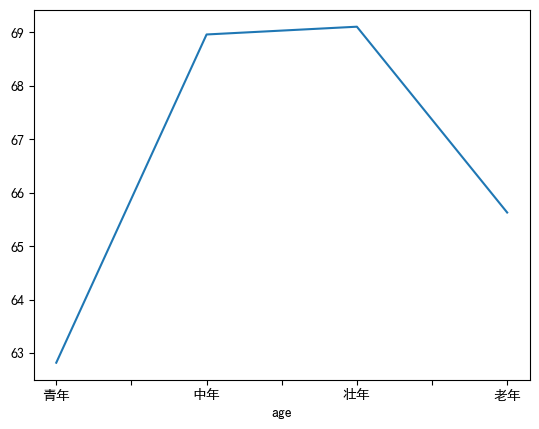

In [137]:
# 对年龄进行分组
pd.cut(df2['年龄'],bins=4,labels=['青年','中年','壮年','老年'])
# 将切分好的数据，添加到原来的数据中
df2['age'] = pd.cut(df2['年龄'],bins=4,labels=['青年','中年','壮年','老年'])
# 按照年龄分组，查看评分的情况
df2.groupby('age')['评分'].mean()
# 通过图表，按照年龄分组，查看评分的情况
df2.groupby('age')['评分'].mean().plot(kind='line')
